# 이미지 증강을 이용한 개 고양이 분류 - CNN

In [1]:
# 데이터 디렉토리 설정
train_dir = "data_ML/cats_and_dogs_filtered/train"
valid_dir = "data_ML/cats_and_dogs_filtered/validation"

In [2]:
# 데이터 증강을 위한 설정
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

# 데이터 증강 객체를 생성(데이터 증강은 일반적으로 이미지에서만 수행)
image_gen = ImageDataGenerator(rescale = (1/255.))

# 증강할 이미지가 있는 디렉토리를 설정
# 이미지 증강을 할 때 여러 레이블이 있는 경우는 디렉토리로 구현
train_gen = image_gen.flow_from_directory(train_dir,
                                         batch_size = 32,
                                         target_size = (224, 224),
                                         classes = ['cats', 'dogs'],
                                         class_mode = 'binary',
                                         seed = 2020)

valid_gen = image_gen.flow_from_directory(valid_dir,
                                         batch_size = 32,
                                         target_size = (224, 224),
                                         classes = ['cats', 'dogs'],
                                         class_mode = 'binary',
                                         seed = 2020)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


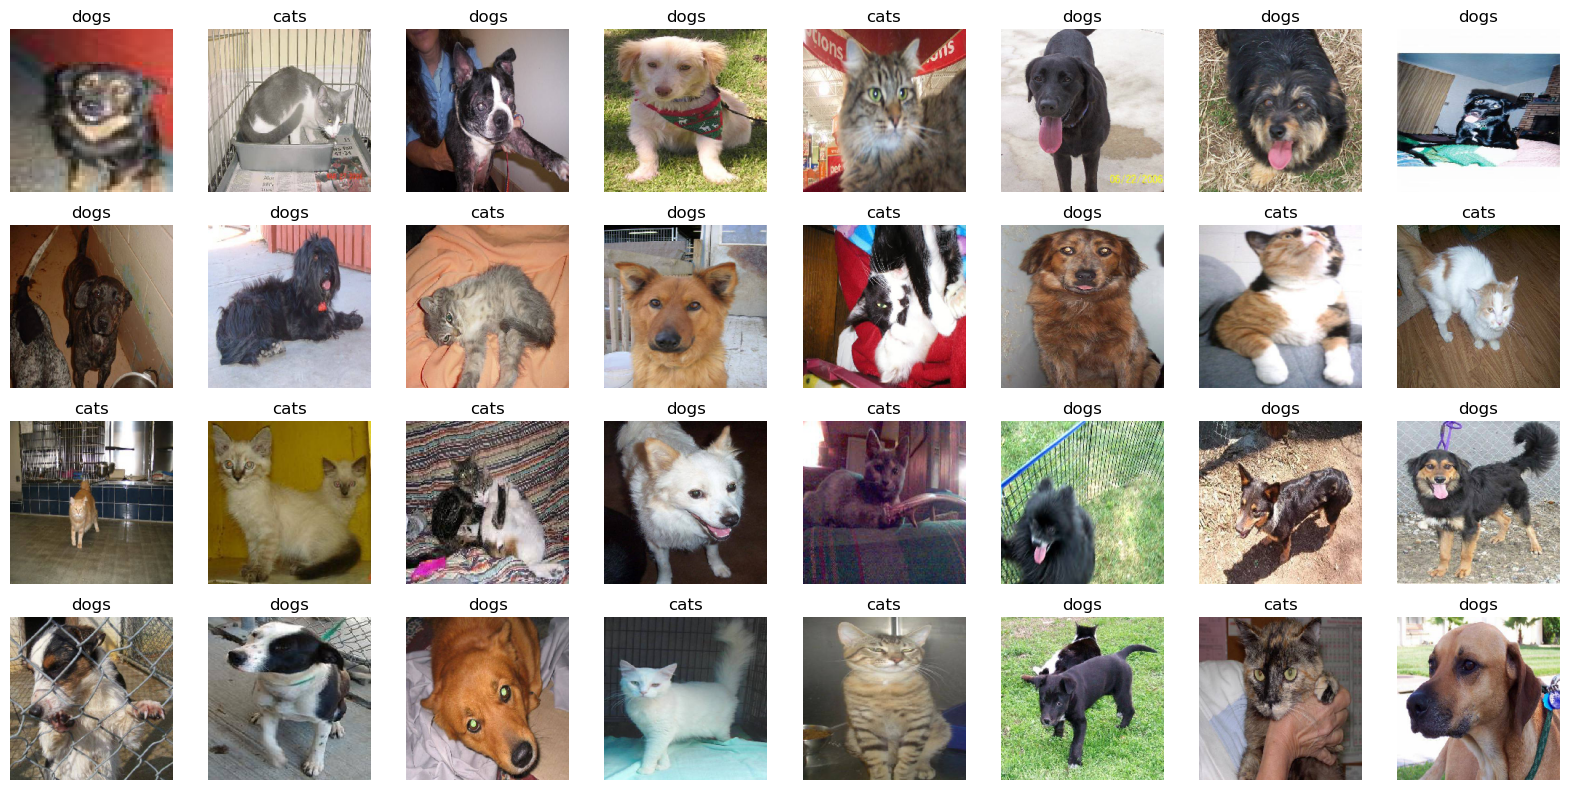

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# 샘플 이미지 출력
class_labels = ['cats', 'dogs']
batch = next(train_gen)
images, labels = batch[0], batch[1]

plt.figure(figsize = (16, 8))
for i in range(32):
    ax = plt.subplot(4, 8, i + 1)
    plt.imshow(images[i])
    plt.title(class_labels[labels[i].astype(np.int8)])
    plt.axis("off")
    
plt.tight_layout()
plt.show()

In [9]:
import tensorflow as tf
from tensorflow import keras

# 모델 생성
def build_model():
    model = tf.keras.Sequential([ 
        # Convolution 층
        # 배치 정규화
        # 정규화하는 이유는 학습을 빨리 하기 위한 목적과 지역 최저점에 도달하는 것을 방지
        # 학습을 할 때 평균과 분산을 조정해서 정규화해줌
        tf.keras.layers.BatchNormalization(), 
        tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        
        # Classifier 출력 층
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        
        tf.keras.layers.Dense(1, activation='sigmoid'),
    ])
    
    return model

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization             │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [8]:
model = build_model()

In [10]:
# 모델 컴파일 및 훈련
model.compile(optimizer = tf.optimizers.Adam(learning_rate = 0.0001),
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

early_stopping_cb = keras.callbacks.EarlyStopping(patience = 5,
                                                 restore_best_weights = True)

history = model.fit(train_gen, validation_data = valid_gen, epochs = 20)

Epoch 1/20


C:\Users\USER\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.5158 - loss: 1.7746 - val_accuracy: 0.5750 - val_loss: 0.6907
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.6609 - loss: 0.6148 - val_accuracy: 0.5120 - val_loss: 0.6871
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.7381 - loss: 0.5205 - val_accuracy: 0.5160 - val_loss: 0.6893
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.7877 - loss: 0.4677 - val_accuracy: 0.5650 - val_loss: 0.6725
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.8187 - loss: 0.4079 - val_accuracy: 0.6590 - val_loss: 0.6119
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.8672 - loss: 0.3499 - val_accuracy: 0.6540 - val_loss: 0.6299
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 0.8887 - loss: 0.2895 - val_accuracy: 0.7110 - val_loss: 0.5420
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.8933 - loss: 0.2737 - val_accuracy: 0.7020 - val_loss: 0.5484
Epo

# RNN 생성

## 시계열 데이터를 생성해주는 함수

In [13]:
def generate_time_series (batch_size, n_steps) :
    freq1, freq2, offset1, offset2 = np.random.rand(4, batch_size, 1)
    time = np.linspace(0, 1, n_steps)
    
    series = 0.5 * np.sin((time - offset1) * (freq1 * 10 + 10))
    series += 0.2 * np.sin((time - offset2) * (freq2 * 20 + 20))
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)    
    
    return series[..., np.newaxis].astype(np.float32)

# 하나의 데이터가 50이지만 묶을 때는 51개씩 묶어줍니다.
series = generate_time_series(10000, 50+1)
print(series.shape)

(10000, 51, 1)


## 데이터 생성

In [16]:
np.random.seed(42)

#데이터 생성
n_steps = 50
series = generate_time_series(10000, n_steps + 1)

# 데이터 분할
# 51개씩 묶었는데 앞의 50개는 예측을 하기 위한 데이터가 되고 
# 뒤의 한개는 예측을 해야하는 데이터
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

In [18]:
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)
print('-------------')
print(y_train.shape)
print(y_valid.shape)
print(y_test.shape)

(7000, 50, 1)
(2000, 50, 1)
(1000, 50, 1)
-------------
(7000, 1)
(2000, 1)
(1000, 1)


### series 를 받아서 시각화 하는 메서드

In [27]:
def plot_series(series, y = None, y_pred = None, x_label = '$t$', y_label = '$x(t)$') :
    plt.plot(series, '.-')
    
    if y is not None :
        plt.plot(n_steps, y, 'bx', markersize = 10)
    if y_pred is not None :
        plt.plot(n_steps, y_pred, 'ro')
    plt.grid(True)
    
    if x_label :
        plt.xlabel(x_label, fontsize = 16)
    if y_label :
        plt.xlabel(y_label, fontsize = 16, rotation = 0)
        
    plt.hlines(0, 0, 100, linewidth = 1)
    plt.axis([0, n_steps + 1, -1, 1])
    

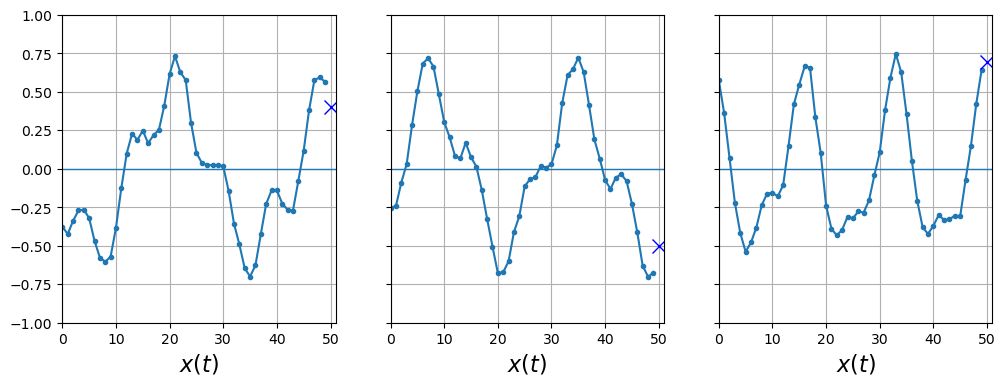

In [29]:
# 3개의 데이터 시각화
fig, axes = plt.subplots(nrows= 1, ncols = 3, sharey = True, figsize = (12, 4))

for col in range(3) :
    plt.sca(axes[col])
    plot_series(X_valid[col, :, 0], y_valid[col, 0])
plt.show()

## 순진한 예측 : 시계열의 마지막 값을 그대로 예측

In [30]:
y_pred = X_valid[:, -1]

# 평균 제곱 오차
np.mean(keras.losses.mean_squared_error(y_valid, y_pred))

0.020211367

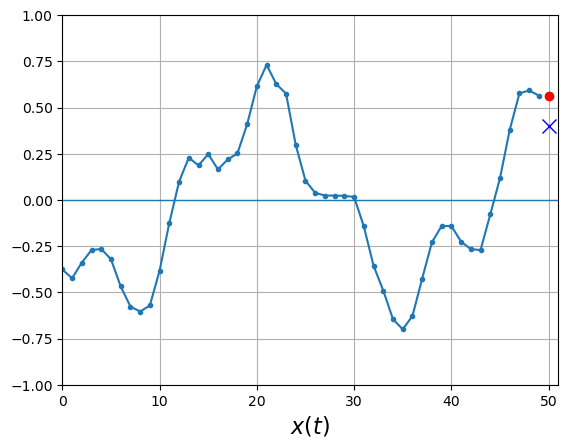

In [31]:
# 예측한 값과 실제 값을 시각화
plot_series(X_valid[0, : ,0], y_valid[0, 0], y_pred[0, 0])

### 완전 연결 층을 사용한 시계열 예측

In [34]:
np.random.seed(42)
tf.random.set_seed(42)

# 시계열 예측을 위한 모델 - 회귀
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [50, 1]), # 50개의 데이터를 가지고 예측
    keras.layers.Dense(1)
])

# 컴파일과 훈련
model.compile(loss = 'mse', optimizer="Adam")
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
model.compile(loss='mse', optimizer='adam')
history = model.fit(X_train, y_train, epochs=20,
                   validation_data = (X_valid, y_valid),
                   callbacks=[early_stopping_cb])

Epoch 1/20


C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2105 - val_loss: 0.0551
Epoch 2/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step - loss: 0.0448 - val_loss: 0.0268
Epoch 3/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 827us/step - loss: 0.0235 - val_loss: 0.0169
Epoch 4/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - loss: 0.0154 - val_loss: 0.0128
Epoch 5/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 960us/step - loss: 0.0118 - val_loss: 0.0107
Epoch 6/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0100 - val_loss: 0.0094
Epoch 7/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step - loss: 0.0087 - val_loss: 0.0083
Epoch 8/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step - loss: 0.0078 - val_loss: 0.0074
Epoch 9/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step - loss: 0.0070 - val_loss: 0.0066
Epoch 10/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step - loss: 0.0064 - val_loss: 0.0060
Epoch 11/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step - loss: 0.0058 - val_loss: 0.0055
Epoch 12/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1

In [35]:
model.evaluate(X_valid, y_valid)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step - loss: 0.0038


0.0038597718812525272

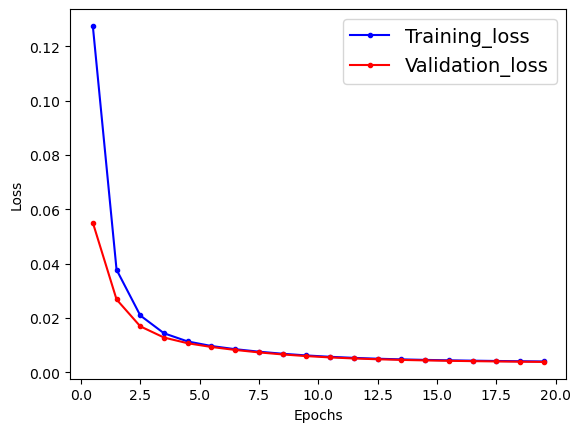

In [36]:
# 훈련 과정의 loss를 시각화: history 객체의 loss와 val_loss
def plot_learning_curve(loss, val_loss):
    plt.plot(np.arange(len(loss)) + .5, loss, "b.-", label="Training_loss")
    plt.plot(np.arange(len(val_loss)) + .5, val_loss, "r.-", label="Validation_loss")
    
    plt.axis = ([1, 20, 0, 0.05])
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    
plot_learning_curve(history.history["loss"], history.history["val_loss"])
plt.show()

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


TypeError: 'list' object is not callable

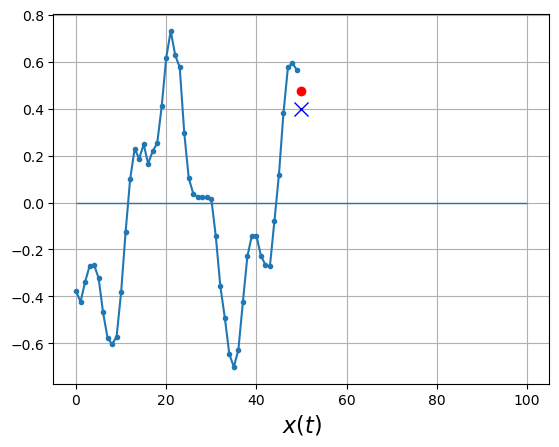

In [37]:
y_pred = model.predict(X_valid)
plot_series(X_valid[0, :, 0], y_valid[0,0], y_pred[0,0])
plt.show()

In [38]:
### 간단한 RNN을 이용한 시계열 예측
# 훈련 과정의 loss를 시각화: history 객체의 loss와 val_loss
np.random.seed(42)
tf.random.set_seed(42)

# 시계열 예측을 위한 모델 - 회귀
# SimpleRNN은 데이터의 길이를 보고 자신이 길이를 설정해서 훈련
model = keras.models.Sequential([
    keras.layers.SimpleRNN(1, input_shape=[None, 1])
])

# 컴파일과 훈련
optimizer = keras.optimizers.Adam(learning_rate=.005)
model.compile(loss = 'mse', optimizer=optimizer)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
model.compile(loss='mse', optimizer='adam')
history = model.fit(X_train, y_train, epochs=20,
                   validation_data = (X_valid, y_valid),
                   callbacks=[early_stopping_cb])

Epoch 1/20


C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2652 - val_loss: 0.2444
Epoch 2/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2234 - val_loss: 0.2052
Epoch 3/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1873 - val_loss: 0.1720
Epoch 4/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1578 - val_loss: 0.1464
Epoch 5/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1348 - val_loss: 0.1243
Epoch 6/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1132 - val_loss: 0.1008
Epoch 7/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0917 - val_loss: 0.0806
Epoch 8/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0731 - val_loss: 0.0633
Epoch 9/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0571 - val_loss: 0.0486
Epoch 10/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0437 - val_loss: 0.0366
Epoch 11/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0328 - val_loss: 0.0273
Epoch 12/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.

In [39]:
model.evaluate(X_valid, y_valid)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0115


0.011334987357258797

In [40]:
np.random.seed(42)
tf.random.set_seed(42)

# 시계열 예측을 위한 모델 - 회귀
# SimpleRNN은 데이터의 길이를 보고 자신이 길이를 설정해서 훈련
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20, return_sequences=True),  
    keras.layers.SimpleRNN(1)
])

# 컴파일과 훈련
optimizer = keras.optimizers.Adam(learning_rate=.005)
model.compile(loss = 'mse', optimizer=optimizer)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=20,
                   validation_data = (X_valid, y_valid),
                   callbacks=[early_stopping_cb])

Epoch 1/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0622 - val_loss: 0.0050
Epoch 2/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0047 - val_loss: 0.0039
Epoch 3/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0041 - val_loss: 0.0038
Epoch 4/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0039 - val_loss: 0.0038
Epoch 5/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0036 - val_loss: 0.0032
Epoch 6/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0034 - val_loss: 0.0036
Epoch 7/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0034 - val_loss: 0.0037


In [41]:
model.evaluate(X_valid, y_valid)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0030


0.0032334220595657825

In [42]:
np.random.seed(42)
tf.random.set_seed(42)

# 시계열 예측을 위한 모델 - 회귀
# SimpleRNN은 데이터의 길이를 보고 자신이 길이를 설정해서 훈련
# 출력층 변경
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20),  
    keras.layers.Dense(1)
])

# 컴파일과 훈련
optimizer = keras.optimizers.Adam(learning_rate=.005)
model.compile(loss = 'mse', optimizer=optimizer)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=20,
                   validation_data = (X_valid, y_valid),
                   callbacks=[early_stopping_cb])

Epoch 1/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0256 - val_loss: 0.0033
Epoch 2/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0038 - val_loss: 0.0032
Epoch 3/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0038 - val_loss: 0.0030
Epoch 4/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0035 - val_loss: 0.0031
Epoch 5/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0034 - val_loss: 0.0030


In [43]:
model.evaluate(X_valid, y_valid)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0030


0.003010591957718134

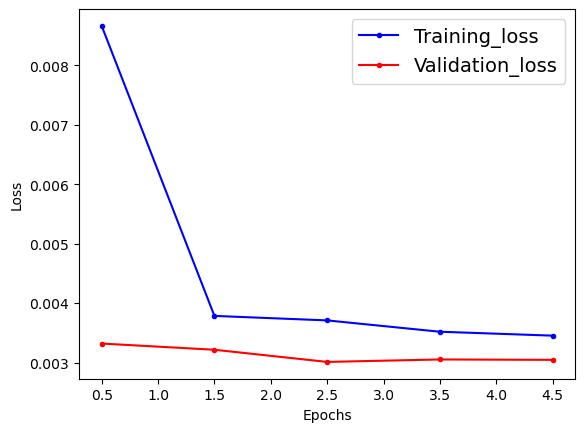

In [44]:
# 훈랸 중 오차를 확인
plot_learning_curve(history.history['loss'], history.history['val_loss'])
plt.show()

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


TypeError: 'list' object is not callable

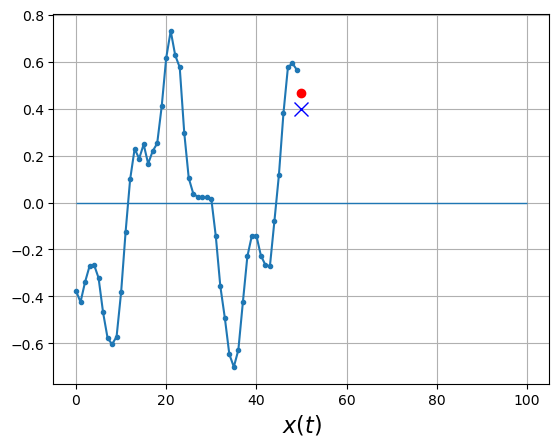

In [45]:
# 예측
y_pred = model.predict(X_valid)
plot_series(X_valid[0, :, 0], y_valid[0,0], y_pred[0,0])
plt.show()

### 다음 10개의 값을 예측 - 훈련된 모델을 이용해서 출력된 값을 이용하는 방법

In [46]:
np.random.seed(42)

series = generate_time_series(1, n_steps + 10)
print(series.shape)

# 앞의 50게(피처) 와 뒤의 10개(타겟)로 분리
X_new, Y_new = series[:, :n_steps], series[:, n_steps:]
# print(X_new.shape)
# print(Y_new.shape)

X = X_new
# 뒤의 10개의 값을 채우기
for step_ahead in range(10) :
    #인덱스를 하나씩 뒤로 옮겨가면서 입력 데이터를 변경해서 다음 값을 예측
    y_pred_one = model.predict(X[:, step_ahead:])[:, np.newaxis, :]
    X = np.concatenate([X, y_pred_one], axis = 1)
    
# 예측한 값
Y_pred = X[:, n_steps:]
print(Y_pred)

(1, 60, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
[[[ 0.5150011 ]
  [ 0.41583687]
  [ 0.34004253]
  [ 0.28426602]
  [ 0.24421339]
  [ 0.18901746]
  [ 0.09018282]
  [-0.07196886]
  [-0.25905898]
  [-0.42956808]]]


TypeError: 'list' object is not callable

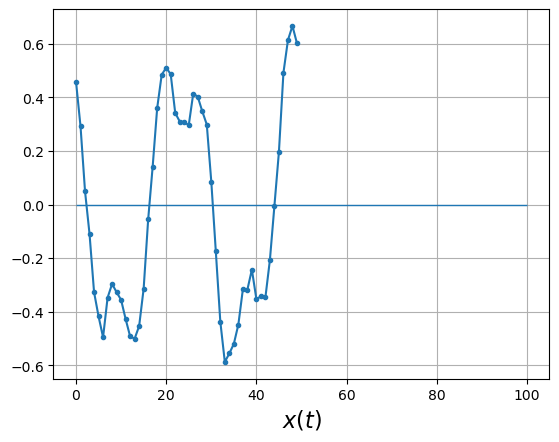

In [64]:
def plot_multiple_forecasts(X, Y, Y_pred):
    n_steps = X.shape[1]
    ahead = Y.shape[1]
    plot_series(X[0, :, 0])
    plt.plot(np.arange(n_steps, n_steps + ahead), Y[0, :, 0], "ro-", label="Actual")
    plt.plot(np.arange(n_steps, n_steps + ahead), Y_pred[0, :, 0], "bx-", label="Forecast", markersize=10)
    plt.axis([0, n_steps + ahead, -1, 1])
    plt.legend(fontsize=14)

plot_multiple_forecasts(X_new, Y_new, Y_pred)
save_fig("forecast_ahead_plot")
plt.show()

## 출력 층을 변경해서 한 번에 10개의 데이터를 예측

In [50]:
# 타겟을 10개의 데이터를 가진 배열로 수정
n_steps = 50

series = generate_time_series(10000, n_steps + 10)
X_train, y_train = series[:7000, :n_steps], series[:7000, -10: , 0]
X_vaild, y_vaild = series[7000:9000, :n_steps], series[7000:9000, -10: , 0]
X_test, y_test = series[9000:, :n_steps], series[9000:, -10: , 0]

print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

(7000, 50, 1)
(2000, 50, 1)
(1000, 50, 1)


In [52]:
# 한꺼번에 10개를 출력하는 모델
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences = True, input_shape = [None, 1]),
    keras.layers.SimpleRNN(20, return_sequences = True),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(10)    
])

model.compile(loss = 'mse', optimizer = 'adam')
history = model.fit(X_train, y_train, epochs =20,
                   validation_data = (X_valid, y_valid))

Epoch 1/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.1032 - val_loss: 0.2390
Epoch 2/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0206 - val_loss: 0.2484
Epoch 3/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0147 - val_loss: 0.2685
Epoch 4/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0125 - val_loss: 0.2690
Epoch 5/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0114 - val_loss: 0.2667
Epoch 6/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0107 - val_loss: 0.2638
Epoch 7/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0102 - val_loss: 0.2621
Epoch 8/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0097 - val_loss: 0.2614
Epoch 9/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0094 - val_loss: 0.2614
Epoch 10/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0091 - val_loss: 0.2619
Epoch 11/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0089 - val_loss: 0.2623
Epoch 12/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 

In [53]:
y_pred = model.predict(X_new)
print(y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step
[[ 0.5062638   0.28978887  0.20274034  0.1291003   0.10243467  0.12326615
   0.20212714  0.14641689  0.03683999 -0.11328553]]


TypeError: 'list' object is not callable

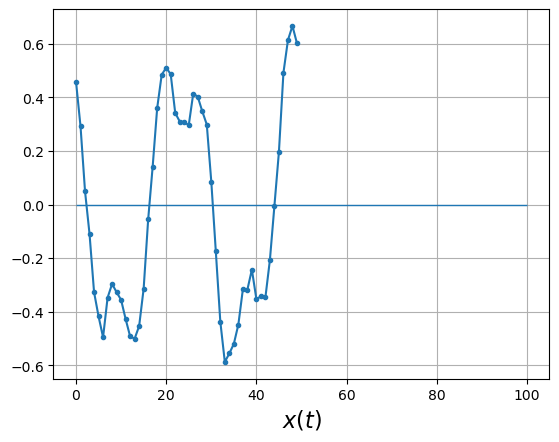

In [54]:
plot_multiple_forecast(X_new, Y_new, Y_pred)
plt.show()
# 이전 모델 보다 나아보입니다.
# 이전 모델은 하나를 예측하고 그 데이터를 포함시켜 다음 하나를 예측하는 방식
# 오차가 누적됩니다.
# 특별한 경우가 아니면 하나를    예측해서 그 다음을 예측하는 방식보다는 한꺼번에
# 예측하는 방식이 성능이 좋은 경우가 많습니다.
# 개선책
# 모든 타임 스텝에서 다음 10개의 값을 예측하도록 하는 것
# 이런 형태를 sequence to sequence 라고 합니다.
# 모든 RNN 층에서 출력을 만들어 냅니다.
# return_sequences 를 True로 설정하고 마지막 출력 층은 다음으로 전달되도록 하기 위해서 Dense 를 
# TimeDistributed 계층으로 감싸면 됩니다.
# 모든 층에서 발생한 손실을 포함 시킬 수 있어서 더 많은 오차 그라디언트가
# 모델에 흐르게 되서 좋은 모델을 만들 가능성이 높아짐
# 타겟을 변경하게 되는데 타겟을 피처와 동일한 shape 을 갖도록 만들어줘야 합니다.


### 시퀀스 투 시퀀스 모델 

In [56]:
n_steps =50
series = generate_time_series(10000, n_steps + 10)

X_train = series[:7000, :n_steps]
X_valid = series[7000:9000, :n_steps]
X_test = series[9000:, :n_steps]

# 타겟도 피처와 동일한 구조로 만들기 위해서 빈 배열 생성
# 이 구조가 many to many 구조로 언어 번역이나 챗봇에 사용
Y = np.empty((10000, n_steps, 10))
for step_ahead in range(1, 10+ 1) :
    Y[..., step_ahead -1] = series[..., step_ahead: step_ahead + n_steps, 0]
Y_train = Y[:7000]
Y_valid = Y[7000:9000]
Y_test = Y[9000:]

print(X_train.shape)
print(Y_train.shape)
print(Y[0])

(7000, 50, 1)
(7000, 50, 10)
[[ 0.21928155  0.26448157  0.2910322   0.31211564  0.39329448  0.40742853
   0.41353086  0.23796119  0.17036869 -0.15130499]
 [ 0.26448157  0.2910322   0.31211564  0.39329448  0.40742853  0.41353086
   0.23796119  0.17036869 -0.15130499 -0.33412376]
 [ 0.2910322   0.31211564  0.39329448  0.40742853  0.41353086  0.23796119
   0.17036869 -0.15130499 -0.33412376 -0.53117549]
 [ 0.31211564  0.39329448  0.40742853  0.41353086  0.23796119  0.17036869
  -0.15130499 -0.33412376 -0.53117549 -0.68745869]
 [ 0.39329448  0.40742853  0.41353086  0.23796119  0.17036869 -0.15130499
  -0.33412376 -0.53117549 -0.68745869 -0.65295899]
 [ 0.40742853  0.41353086  0.23796119  0.17036869 -0.15130499 -0.33412376
  -0.53117549 -0.68745869 -0.65295899 -0.59626633]
 [ 0.41353086  0.23796119  0.17036869 -0.15130499 -0.33412376 -0.53117549
  -0.68745869 -0.65295899 -0.59626633 -0.33733892]
 [ 0.23796119  0.17036869 -0.15130499 -0.33412376 -0.53117549 -0.68745869
  -0.65295899 -0.59626

In [59]:
# 한꺼번에 10개를 출력하는 모델
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences = True, input_shape = [None, 1]),
    keras.layers.SimpleRNN(20, return_sequences = True),
    keras.layers.SimpleRNN(20, return_sequences = True), # 출력하고
    # 출력을 되돌려주는 것
    keras.layers.TimeDistributed(keras.layers.Dense(10)) 
])



model.compile(loss = 'mse', optimizer = 'adam')
history = model.fit(X_train, Y_train, epochs =20,
                   validation_data = (X_valid, Y_valid))

Epoch 1/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - loss: 0.1054 - val_loss: 0.0417
Epoch 2/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0395 - val_loss: 0.0364
Epoch 3/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0354 - val_loss: 0.0342
Epoch 4/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0334 - val_loss: 0.0324
Epoch 5/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0317 - val_loss: 0.0306
Epoch 6/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0299 - val_loss: 0.0290
Epoch 7/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0285 - val_loss: 0.0279
Epoch 8/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0273 - val_loss: 0.0269
Epoch 9/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0263 - val_loss: 0.0260
Epoch 10/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0253 - val_loss: 0.0253
Epoch 11/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0245 - val_loss: 0.0245
Epoch 12/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
[[[ 0.4540791 ]
  [ 0.36484516]
  [ 0.20194076]
  [ 0.19345327]
  [ 0.20350602]
  [ 0.25884628]
  [ 0.24583101]
  [ 0.13509367]
  [ 0.01122888]
  [-0.26238245]]]
[[[ 0.4745433 ]
  [ 0.33472073]
  [ 0.21813914]
  [ 0.16740383]
  [ 0.15068696]
  [ 0.17929932]
  [ 0.23732811]
  [ 0.20507568]
  [ 0.10530291]
  [-0.04979764]]]


TypeError: 'list' object is not callable

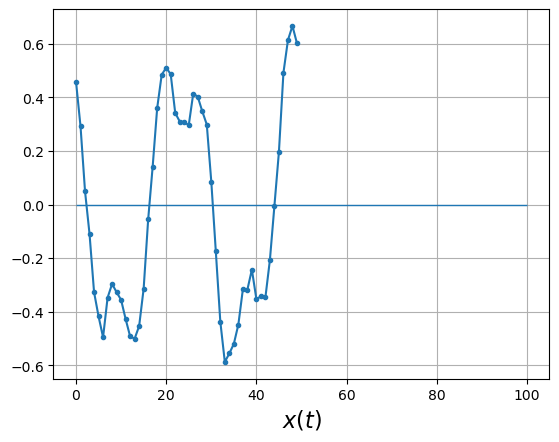

In [61]:
# 예측과 시각화
np.random.seed(42)
series = generate_time_series(1, 50 + 10)
X_new, Y_new, = series[:, :50, :], series[:, 50:, :]
Y_pred = model.predict(X_new)[:, -1][..., np.newaxis]
print(Y_new)
print(Y_pred)

plot_multiple_forecast(X_new, Y_new, Y_pred)

## Embedding

In [65]:
from tensorflow.keras.layers import Embedding

# 100개의 단어를 3개의 숫자로 만들어주는 embedding
embedding_layer = Embedding(100, 3)
result = embedding_layer(tf.constant([12, 3, 15, 13]))
print(result)

tf.Tensor(
[[-0.00155491 -0.02380247  0.02125749]
 [ 0.03584344 -0.00381272  0.04920825]
 [-0.03343313 -0.00227556  0.00825961]
 [ 0.03382562 -0.01956852  0.04826189]], shape=(4, 3), dtype=float32)
